# Feature Scaling

In [21]:
# Import 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# imporrt dataset
import pandas as pd
dataset = pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Excel project\Order.xlsx")
dataset.head(3)

,Row ID,Order ID,Order Day2,Order Month,Order Year,Ship Day,Ship_Month,Ship_Year],Ship Mode,Customer ID,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,Thursday,August,2016,Friday,November,2016,Second Class,CG-12520,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,Thursday,August,2016,Friday,November,2016,Second Class,CG-12520,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,Tuesday,December,2016,Thursday,June,2016,Second Class,DV-13045,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
dataset.shape

(4999, 25)

In [5]:
dataset.describe() 


,Row ID,Order Year,Ship_Year],Postal Code,Sales,Quantity,Discount,Profit
count,4999.000000,4999.00000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.318664,2015.69914,2015.713743,55003.045409,228.069084,3.795159,0.156937,25.682075
std,1443.607450,1.12250,1.124446,31867.591871,630.373684,2.240102,0.206848,208.777966
min,1.000000,2014.00000,2014.000000,1040.000000,0.444000,1.000000,0.000000,-3839.990400
25%,1250.500000,2015.00000,2015.000000,22980.000000,16.560000,2.000000,0.000000,1.762400
50%,2500.000000,2016.00000,2016.000000,55122.000000,52.200000,3.000000,0.200000,8.636000
75%,3750.500000,2017.00000,2017.000000,90004.000000,210.686000,5.000000,0.200000,28.788000
max,5000.000000,2017.00000,2018.000000,99301.000000,22638.480000,14.000000,0.800000,5039.985600


In [6]:
dataset['Sales'].isnull().sum()

0

In [7]:
dataset.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14788\1206291995.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Sales"])


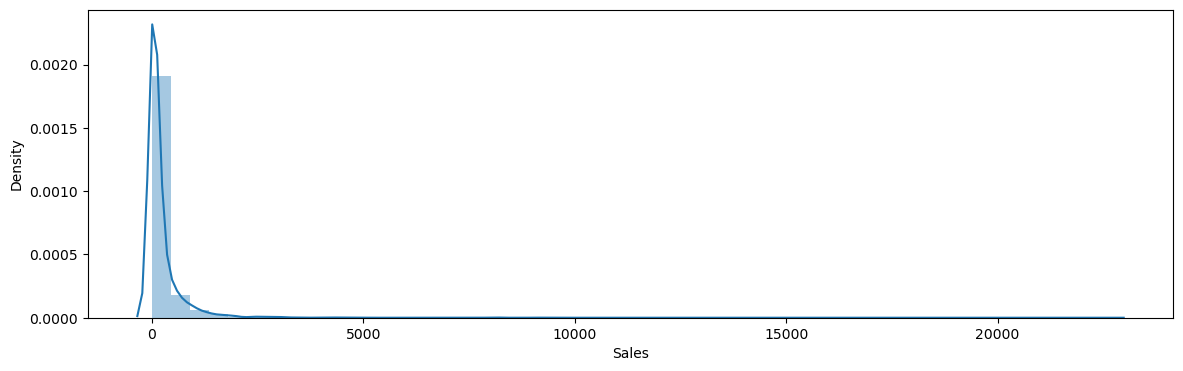

In [23]:
# Scale the sales column 
plt.figure(figsize=(14,4))
sns.distplot(dataset["Sales"])
plt.show() # The right tale of this Distribution plot is very long which shows that in this column outliers are present

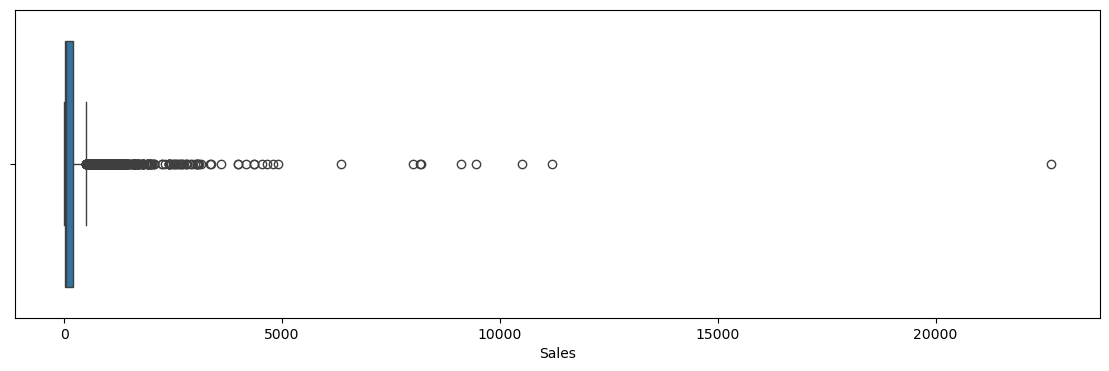

In [25]:
# Box plot
plt.figure(figsize=(14,4))
sns.boxplot(x=dataset["Sales"],data=dataset)
plt.show() # This is also one of t6he method to check the outloiers in your column

In [27]:
# Quantiles
Q1=dataset["Sales"].quantile(0.25)
Q3=dataset["Sales"].quantile(0.75)
Q1,Q3

(16.56, 210.68599999999998)

In [29]:
# Inter quartile range
IQR=Q3-Q1
IQR

194.12599999999998

In [31]:
# Critical values 
Min_range=Q1-(1.5*(IQR))
Max_range=Q1+(1.5*(IQR))
Min_range,Max_range

(-274.62899999999996, 307.74899999999997)

In [33]:
# dataset after removing outliers
dataset=dataset[dataset["Sales"]<Max_range]

In [35]:
# Checking Shape of the dataset
dataset.shape

(4065, 25)

In [37]:
# Distribution plot after removing outliers 
sns.distplot(dataset["Sales"])
plt.show() '''we see after removing the outliers their are new numbers which behave as an outlier so for that you dont remove them because we 
already remove approx 800 cells data.'''

SyntaxError: invalid syntax (2584021963.py, line 3)

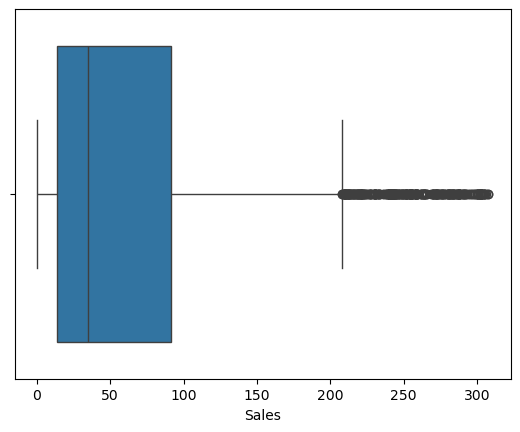

In [39]:
# Box plot 
sns.boxplot(x=dataset["Sales"],data=dataset)
plt.show() # here you also see some of the new numbers behave as an outlier 

In [41]:
# Checking the data type of the column before doing feature scaling.
dataset["Sales"].astype

<bound method NDFrame.astype of 0       261.960
2        14.620
4        22.368
5        48.860
6         7.280
         ...   
4994     52.064
4995     48.784
4996     13.092
4997    109.592
4998     56.700
Name: Sales, Length: 4065, dtype: float64>

In [43]:
# Feature scaling for this column 
from sklearn.preprocessing import StandardScaler # Import library

In [45]:
sc=StandardScaler()
sc.fit(dataset[["Sales"]]) # This is for fit the dataset 

StandardScaler()

In [47]:
v=sc.transform(dataset[["Sales"]]) # To transform the data 

In [49]:
dataset["New_Sales_Scaling"]=v # Add in the original dataset as a column 

In [51]:
dataset.head(2) # Checking that it add properly in the end or not

,Row ID,Order ID,Order Day2,Order Month,Order Year,Ship Day,Ship_Month,Ship_Year],Ship Mode,Customer ID,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,New_Sales_Scaling
0,1,CA-2016-152156,Thursday,August,2016,Friday,November,2016,Second Class,CG-12520,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2.625267
2,3,CA-2016-138688,Tuesday,December,2016,Thursday,June,2016,Second Class,DV-13045,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,-0.694876


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14788\3529452134.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Sales"],ax=axes[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14788\3529452134.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["New_Sales_Scaling"],ax=axes[1])


KeyError: 'Min_max_Sales_Scaling'

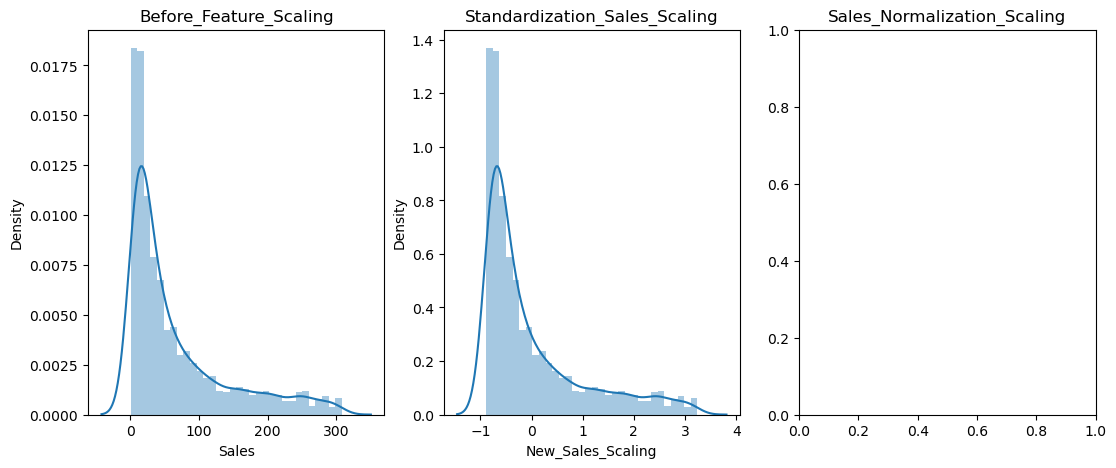

In [53]:
# Code to make the plots 
fig,axes=plt.subplots(1,3,figsize=(13,5))
axes[0].set_title("Before_Feature_Scaling")
sns.distplot(dataset["Sales"],ax=axes[0])
axes[1].set_title("Standardization_Sales_Scaling")
sns.distplot(dataset["New_Sales_Scaling"],ax=axes[1])
axes[2].set_title("Sales_Normalization_Scaling")
sns.distplot(dataset["Min_max_Sales_Scaling"],ax=axes[2])
plt.suptitle("Feature_Scaling", fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(dataset["New_Sales_Scaling"])
plt.show() # Now see the scatter plot of the Sales column 

In [ ]:
mean_scal=dataset["New_Sales_Scaling"].mean()
var_scal=dataset["New_Sales_Scaling"].var()
mean_scal,var_scal # The standardization makes the mean similiar to zero and variance similiar to 1

# Normalization

In [59]:
from sklearn.preprocessing import MinMaxScaler # Import library for normalization another name is min,max

In [61]:
ms=MinMaxScaler()
ms.fit(dataset[["Sales"]]) # To fit the data 

MinMaxScaler()

In [63]:
dataset["Min_max_Sales_Scaling"]=ms.transform(dataset[["Sales"]]) # Transform and add as a column to the dataset.

In [65]:
dataset.head(2) #Check the new column is added or not

,Row ID,Order ID,Order Day2,Order Month,Order Year,Ship Day,Ship_Month,Ship_Year],Ship Mode,Customer ID,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,New_Sales_Scaling,Min_max_Sales_Scaling
0,1,CA-2016-152156,Thursday,August,2016,Friday,November,2016,Second Class,CG-12520,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2.625267,0.851228
2,3,CA-2016-138688,Tuesday,December,2016,Thursday,June,2016,Second Class,DV-13045,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,-0.694876,0.046143


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14788\3390033984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Min_max_Sales_Scaling"])


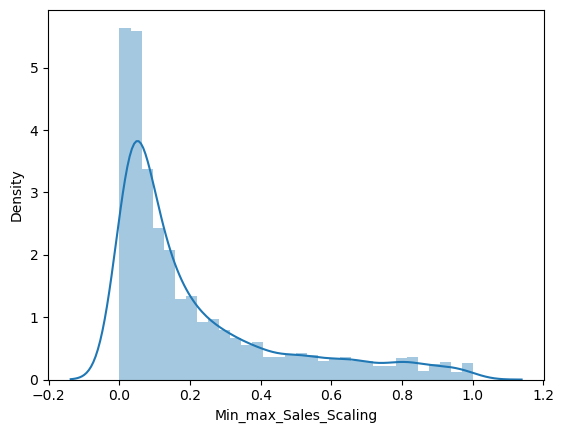

In [67]:
sns.distplot(dataset["Min_max_Sales_Scaling"])
plt.show()